In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
%matplotlib inline

/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print("{} in train. {} in test.".format(len(y_train),len(y_test)))

/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


404 in train. 102 in test.


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

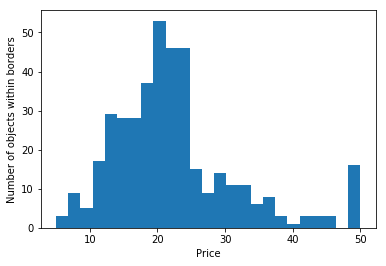

In [3]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zakirov/tf-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

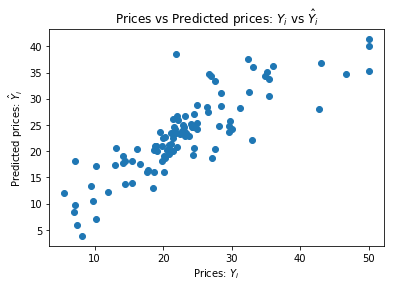

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [6]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.4641858124067233
mse = 23.19559925642308
prediction variance = 45.78048685033742


-----------
# Мой код и результаты ниже

## Homework 2. Зависимость от размера обучающей выборки

In [7]:
import tqdm

In [8]:
def get_random_train(size):
    """size: train size """
    idx = np.random.choice(np.arange(404), size=size, replace=False)
    return X_train[idx], y_train[idx]

In [22]:
train_sizes = np.arange(52,405,4)
AVERAGE_NUM = 200
maes = []
mses = []
r2s = []
maes_std = []
mses_std = []
r2s_std = []

for tr_size in tqdm.tqdm(train_sizes):
    tmp_maes = []
    tmp_mses = []
    tmp_r2s = []
    for run in range(AVERAGE_NUM):
        # fit & predict
        X_tr, Y_tr = get_random_train(tr_size)
        regression = LinearRegression()
        regression.fit(X_tr, Y_tr)
        y_pred = regression.predict(X_test)
        # calculate metrics
        tmp_maes.append(mean_absolute_error(y_test, y_pred))
        tmp_mses.append(mean_squared_error(y_test, y_pred))
        tmp_r2s.append(r2_score(y_test, y_pred))
    maes.append(np.mean(tmp_maes))
    maes_std.append(np.std(tmp_maes))
    mses.append(np.mean(tmp_mses))
    mses_std.append(np.std(tmp_mses))
    r2s.append(np.mean(tmp_r2s))
    r2s_std.append(np.std(tmp_r2s))

maes = np.array(maes)
mses = np.array(mses)
r2s = np.array(r2s)
maes_std = np.array(maes_std)
mses_std = np.array(mses_std)
r2s_std = np.array(r2s_std)

100%|██████████| 89/89 [00:31<00:00,  2.86it/s]


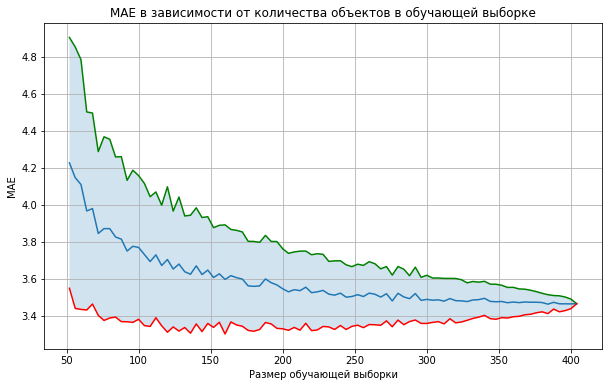

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, maes)
plt.plot(train_sizes, maes+maes_std, color='green')
plt.plot(train_sizes, maes-maes_std, color='red')
plt.fill_between(train_sizes, maes+maes_std, maes-maes_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Размер обучающей выборки")
plt.ylabel("MAE")
plt.title("MAE в зависимости от количества объектов в обучающей выборке");

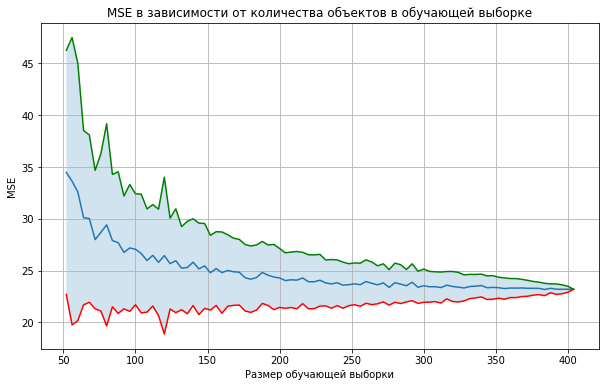

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mses)
plt.plot(train_sizes, mses+mses_std, color='green')
plt.plot(train_sizes, mses-mses_std, color='red')
plt.fill_between(train_sizes, mses+mses_std, mses-mses_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Размер обучающей выборки")
plt.ylabel("MSE")
plt.title("MSE в зависимости от количества объектов в обучающей выборке");

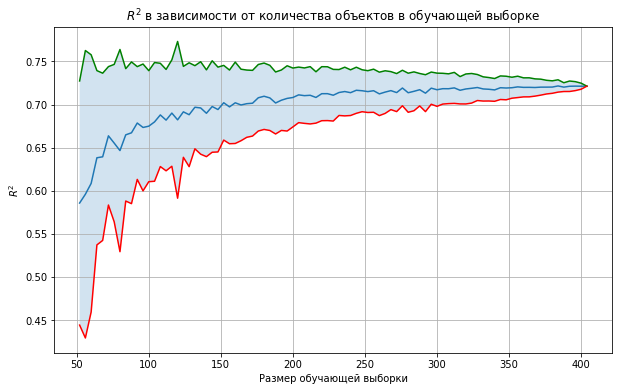

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, r2s)
plt.plot(train_sizes, r2s+r2s_std, color='green')
plt.plot(train_sizes, r2s-r2s_std, color='red')
plt.fill_between(train_sizes, r2s+r2s_std, r2s-r2s_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Размер обучающей выборки")
plt.ylabel("$R^2$")
plt.title("$R^2$ в зависимости от количества объектов в обучающей выборке");

## Homework 3. Зависимость от количества признаков  
Каждый раз берем случайные фичи, обучаемся на них и на них же предсказываем

In [26]:
def get_random_feature_idx(size):
    """size: number of features """
    idx = np.random.choice(np.arange(13), size=size, replace=False)
    return X_train[:,idx], y_train

In [27]:
feature_sizes = np.arange(3,14)
AVERAGE_NUM = 200
maes = []
mses = []
r2s = []
maes_std = []
mses_std = []
r2s_std = []

for f_size in feature_sizes:
    tmp_maes = []
    tmp_mses = []
    tmp_r2s = []
    for run in range(AVERAGE_NUM):
        # fit & predict
        rnd_idx = np.random.choice(np.arange(13), size=f_size, replace=False)
        X_tr, Y_tr = X_train[:,rnd_idx], y_train
        regression = LinearRegression()
        regression.fit(X_tr, Y_tr)
        y_pred = regression.predict(X_test[:,rnd_idx]) #на тех же фичах на которых учились
        # calculate metrics
        tmp_maes.append(mean_absolute_error(y_test, y_pred))
        tmp_mses.append(mean_squared_error(y_test, y_pred))
        tmp_r2s.append(r2_score(y_test, y_pred))
    maes.append(np.mean(tmp_maes))
    maes_std.append(np.std(tmp_maes))
    mses.append(np.mean(tmp_mses))
    mses_std.append(np.std(tmp_mses))
    r2s.append(np.mean(tmp_r2s))
    r2s_std.append(np.std(tmp_r2s))

maes = np.array(maes)
mses = np.array(mses)
r2s = np.array(r2s)
maes_std = np.array(maes_std)
mses_std = np.array(mses_std)
r2s_std = np.array(r2s_std)

In [28]:
train_sizes = feature_sizes # чтоб не не переименовывать ниже

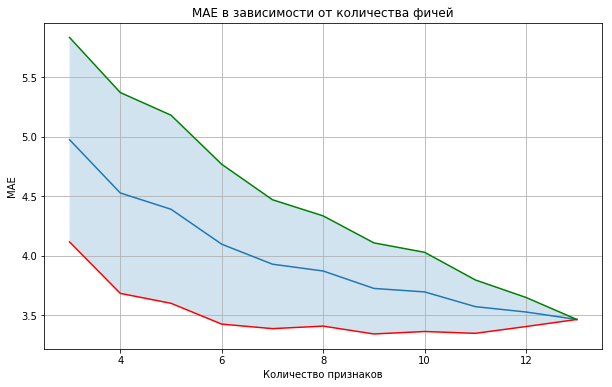

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, maes)
plt.plot(train_sizes, maes+maes_std, color='green')
plt.plot(train_sizes, maes-maes_std, color='red')
plt.fill_between(train_sizes, maes+maes_std, maes-maes_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Количество признаков")
plt.ylabel("MAE")
plt.title("MAE в зависимости от количества фичей");

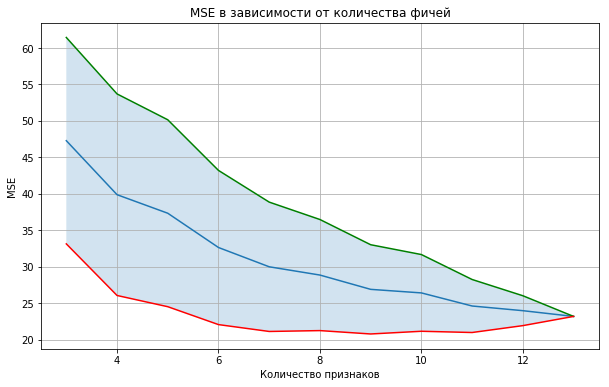

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mses)
plt.plot(train_sizes, mses+mses_std, color='green')
plt.plot(train_sizes, mses-mses_std, color='red')
plt.fill_between(train_sizes, mses+mses_std, mses-mses_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Количество признаков")
plt.ylabel("MSE")
plt.title("MSE в зависимости от количества фичей");

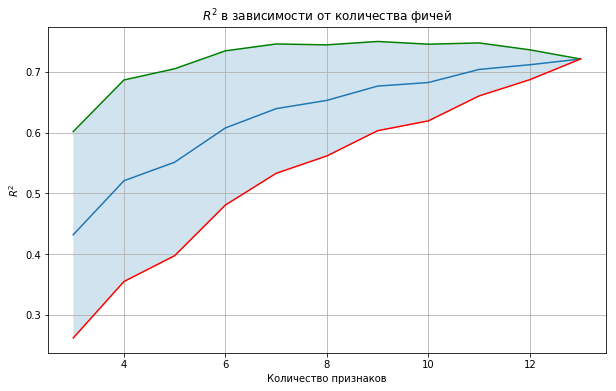

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, r2s)
plt.plot(train_sizes, r2s+r2s_std, color='green')
plt.plot(train_sizes, r2s-r2s_std, color='red')
plt.fill_between(train_sizes, r2s+r2s_std, r2s-r2s_std,alpha=0.2)
plt.grid(True)
plt.plot
plt.xlabel("Количество признаков")
plt.ylabel("$R^2$")
plt.title("$R^2$ в зависимости от количества фичей");

Видно что чем больше признаков, тем лучше в среднем качество. Mak